# Математика для анализа данных.
## Урок 2. Векторное дифференцирование. Линейная регрессия.

### План занятия

1. Линейная регрессия: скалярный -> матричный вид. Зачем нужно векторное дифференцирование (на доске).

2. Учимся считать производные по вектору (на доске).

3. Пишем градиентный спуск в векторном виде (код ниже).

4. Разбираемся с вариациями градиентного спуска (презентация).

Сгенерируем выборку для задачи регрессии и визуализируем данные

(100,)
(100, 1)


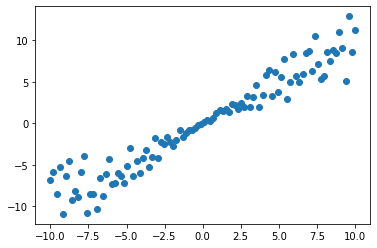

In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y)

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели. 
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [5]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем стохастический градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=X^T(Xw-y).$$

Итак, реализуем метод стохастического градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

In [12]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели

In [13]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

Применим градиентный спуск

In [14]:
track, weights = stochastic_gradient_descent(X, y, 0.01, 100)

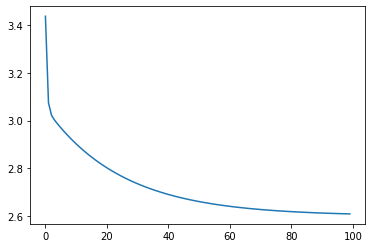

In [15]:
plt.plot(track)

Сделаем предсказание

In [16]:
pred = predict(X, weights)

Добавим к графику полученную регрессионную прямую

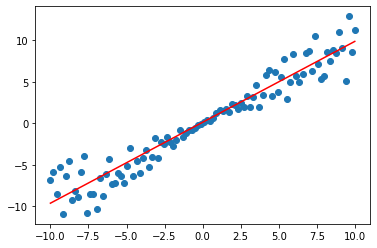

In [17]:
plt.scatter(X, y)
plt.plot(X, pred, '-', c = 'r')